In [4]:
from tensorflow import keras
from keras.models import load_model

In [95]:
model=load_model('myResNet50.h5')
modelDict=model.__dict__

In [28]:
list_of_layers=[]
for x in model.layers:
    list_of_layers.append((str(x.name_scope())[:-1]))

In [32]:
if 'conv1' in list_of_layers:
    content_layers=['conv1']

style_layers=['BN2b_branch2a','BN3a_branch2c','RES3a_branch1','BN4e_branch2b']
check=all(item in list_of_layers for item in style_layers)
if check:
    print("All Set!")


All Set!


In [81]:
from matplotlib.pyplot import imread
import numpy as np
from PIL import Image
from tensorflow.python.keras.preprocessing import image as kp_image
import tensorflow as tf

In [77]:
content_path="eminem.jpg"
style_path="images/images/Francisco_Goya/Francisco_Goya_85.jpg"


In [79]:
def img_load(img_path):
    img=Image.open(img_path)
    long=max(img.size)
    scale=512/long
    img=img.resize((round(img.size[0]*scale),round(img.size[1]*scale)),Image.ANTIALIAS)
    img = kp_image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    
    return img

def imshow(img, title=None):
  out = np.squeeze(img, axis=0)
  out = out.astype('uint8')
  plt.imshow(out)
  if title is not None:
    plt.title(title)
  
  plt.imshow(out)



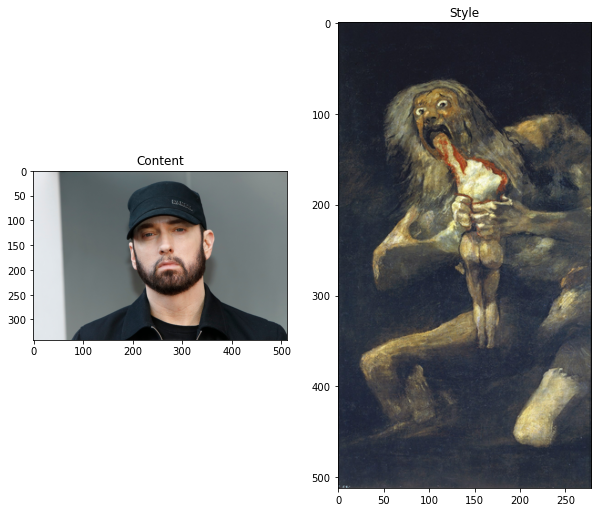

In [80]:
plt.figure(figsize=(10,10))
content_image=img_load(content_path).astype('uint8')
plt.subplot(1, 2, 1)
imshow(content_image,"Content")
style_image=img_load(style_path).astype('uint8')
plt.subplot(1, 2, 2)
imshow(style_image,"Style")

In [85]:
def contentCostComputation(aC,aG):
    m,n_H,n_W,n_c=aG.get_shape().as_list()
    aC_unrolled=tf.transpose(tf.reshape(aC, [n_H*n_W,n_C]))
    aG_unrolled=tf.transpose(tf.reshape(aG, [n_H*n_W,n_C]))
    J_content=tf.reduce_sum(tf.square(tf.subtract(a_C_unrolled,a_G_unrolled)))*1/(4*n_H*n_C*n_W)
    return J_content

In [86]:
def styleMatrix(A):
    return tf.matmul(A,tf.transpose(A))


In [87]:
def layerStyleCostComputation(aS,aG):
    m,n_H,n_W,n_c=aG.get_shape().as_list()
    aS = tf.transpose(tf.reshape(aS,shape=[n_H*n_W,n_C]))
    aG = tf.transpose(tf.reshape(aG,shape=[n_H*n_W,n_C]))
    GS=styleMatrix(aS)
    GG=styleMatrix(aG)
    J_style_layer=tf.reduce_sum(tf.square(tf.subtract(GS,GG)))*1/(4*(n_C**2)*(n_H*n_W)**2)
    return J_style_layer


In [96]:
style_layers=[('BN2b_branch2a',0.3),('BN3a_branch2c',0.3),('RES3a_branch1',0.3),('BN4e_branch2b',0.3)]

In [97]:
def styleCostComputation(model,style_layers):
    J_style=0
    for layer_name,coeff in style_layers:
        out=model[layer_name]
        aS=sess.run(out)
        aG=out
        J_style_layer=layerStyleCostComputation(aS,aG)
        J_style+=coeff*J_style_layer

    return J_style



In [102]:
def totalCost(J_Content,J_Style,alpha=10,beta=40):
    J=alpha*J_Content+beta*J_Style
    return J